In [18]:
# import libraries
import numpy as np
import pandas as pd
import os
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import re

from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# load in directories
from experiment_code.constants import Defaults
from experiment_code.visualization import visualize
from experiment_code import preprocess

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# preprocess peele dataset
df = preprocess.preprocess_peele(bad_subjs=[1194659.0], cloze_filename="Peele_cloze_3.csv") # bad_subjs and cloze_filename are optional args (defined as **kwargs in the function)
# you can also run the command without any input - preprocess.preprocess_peele() but bad subjs won't be removed and cloze probs won't be added to the dataframe


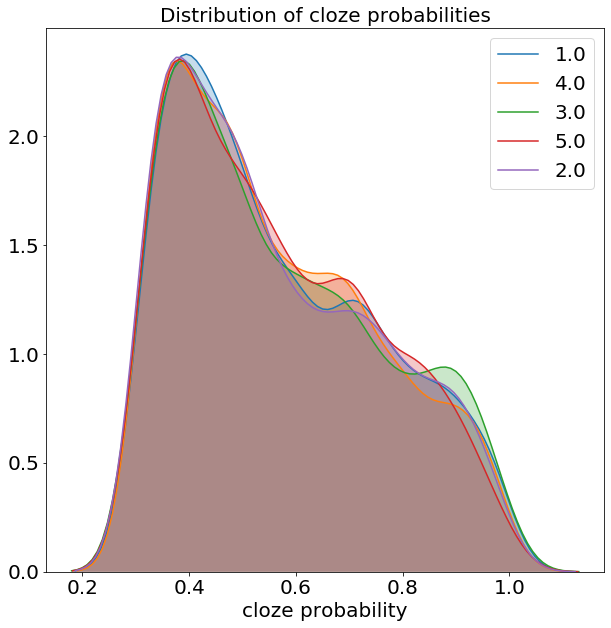

In [24]:
# do some visualization
# if you want to inspect the different methods (i.e. cloze_cort_distribution) on each function (i.e. visualize)
# type <function name>. and then hit tab
# if you want to know the args and kwargs (i.e. inputs) for each method
# type <function name>.<method name>?(i.e. visualize.cloze_cort_distribution?)
visualize.cloze_cort_distribution(df)